In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

---

# Objetivo:
O objetivo desse artigo é explicar o funcionamento de uma CNN (Convolutional Neural Net), ou Rede Neural Convolucional, à fundo. Começando por explicar o que é uma convolução, usando algumas visualizações que auxiliam no entedimento não só o que é uma convolução, mas também como essa pode ser útil no desafio de classificação de imagens. Depois será explicado o que é uma rede neural e como essa usa convoluções para aprender a reconhecer imagens.

### Objetivo parcial:
Será utilizado um dataset de diferentes espécies de borboleta para auxiliar na explicação de CNNs e, ao final, será utilizado uma CNN pré-treinada para treinar um modelo à reconhecer essas espécies (dentre as 75 espécies contidas no dataset), montando assim um classificador de espécies de borboletas, onde o usuário pode entrar com a imagem da borboleta que ele quiser reconhecida.

### Ferramentas utilizadas:
Utiliza-se ao longo desse artigo as bibliotecas:
- **numpy**: principalmente para a manipulação de matrizes
- **pandas**: para leitura e escrita de dados
- **scipy**: para utilizar de suas ferramentas de convolução
- **matplotlib**: para visualização de dados
- **pillow (PIL)**: para manipulação de imagens
</br></br>
---

In [56]:
df = pd.read_csv('../input/butterfly-image-classification/Training_set.csv')

In [3]:
df.describe()

,filename,label
count,6499,6499
unique,6499,75
top,Image_1.jpg,MOURNING CLOAK
freq,1,131


In [6]:
from PIL import Image
im = Image.open(r'../input/butterfly-image-classification/train/Image_10.jpg')
newsize = (32, 32)
im2 = im.resize(newsize)

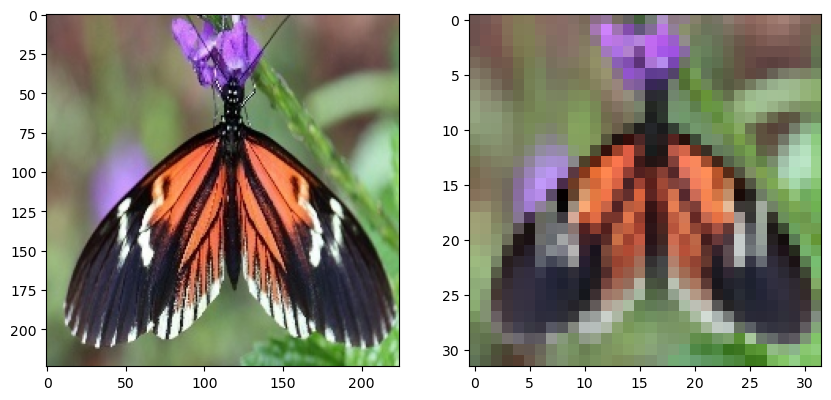

In [8]:
from matplotlib import pyplot as plt
img = np.asarray(im2)
original = np.asarray(im, dtype=np.uint8)
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(original)
axs[1].imshow(img)

---

# Dataset:
Acima, foi pego uma imagem do dataset de borboletas com a qual vamos trabalhar. A qualidade dela foi diminuída apenas com o propósito de visualizar melhor o que uma convolução faz na imagem de forma simplificada.

Essa imagem então foi transformada num array de 32 por 32 por 3, sendo 32 por 32 sua resolução e o 3 para compor os 3 canais de RGB, formando as cores. Por exemplo, o RGB do pixel em 16 x 16:

In [9]:
x = img[16][16]
x

array([93, 36, 33], dtype=uint8)

---

In [37]:
filter_1 = np.zeros((3,3,3), dtype=float)

filter_1[1][1][0] = 0.4
filter_1[1][1][1] = 0.3
filter_1[1][1][2] = 0.3

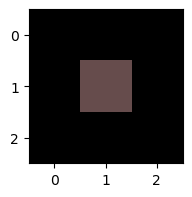

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(2,2))
ax.imshow(filter_1)

---

Acima, observa-se uma matriz 3 por 3, com apenas o valor do meio diferente de zero (representado por cores), onde as areas pretas simbolizam valor zero na matriz. Essa matriz representa um filtro, ou kernel, com o qual se utiliza nas convoluções para alterar as imagens. A imagem resultante da convolução da borboleta original (a imagem abaixo da esquerda), por esse filtro é vista abaixo (a imagem da direita).

In [45]:
img_2 = np.zeros((32,32,3), dtype=float)

for i in range(32):
    for j in range(32):
        img_2[i][j][0] = img[:,:,0][i][j] * 0.4
        img_2[i][j][1] = img[:,:,1][i][j] * 0.3
        img_2[i][j][2] = img[:,:,2][i][j] * 0.3

img_2 = np.asarray(img_2, dtype=np.uint8)
np.shape(img_2)

(32, 32, 3)

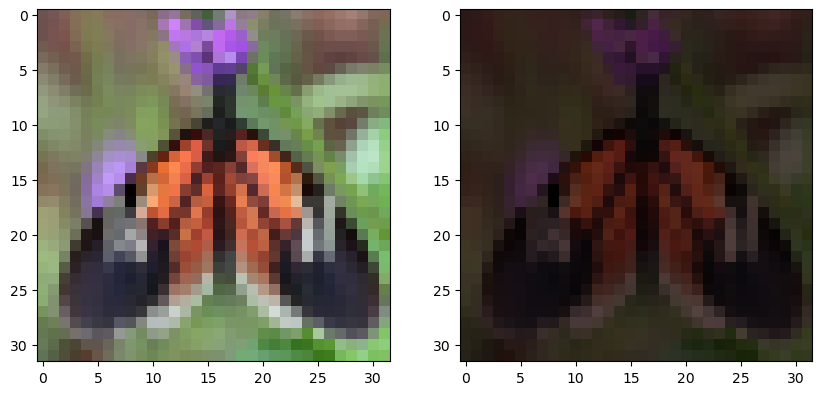

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(img)
axs[1].imshow(img_2)

---

### Como foi gerada essa nova imagem?
A ideia da convolução na imagem, é "passar" o filtro na imagem original, pixel por pixel (medidos pelo centro do filtro), gerando um produto escalar de todos os valores do filtro com o pixel; que então será o valor daquele pixel na nova imagem.

# Convolução em imagens
Convolução é um operador matemático que pega duas funções e resulta em uma terceira que mede a soma do produto dessas funções ao longo da região em que uma função sobrepõe a outra, através do deslocamento entre elas.
Esse mesmo conceito é aplicado em imagens, onde o filtro é sobreposto a imagem e o produto (chamado de multiplicação element-wise) entre ambos vai formando a nova imagem, pedaço por pedaço. Há vários filtros úteis, como filtros para borrar a imagem, filtros para atenuar certas cores, detectar bordas, etc.
Na imagem acima, o filtro foi criado manualmente com o propósito de dessaturar a imagem, porém deixando um pouco de ênfase na cor vermelha.

---
Agora usaremos a função fftconvolve da biblioteca signal do scipy. Essa função realiza a convolução exatamente como esperado, porém, o resultado (imagem mais à direita abaixo) é diferente da imagem anterior, isso se deve ao fato de que convolução, por convenção matemática, inverte os filtros em 180 graus antes de realizar as operações.

In [50]:
from scipy import signal as sig
img_3 = sig.fftconvolve(img, filter_1, mode = 'same')
img_3 = np.asarray(img_3, dtype=np.uint8)

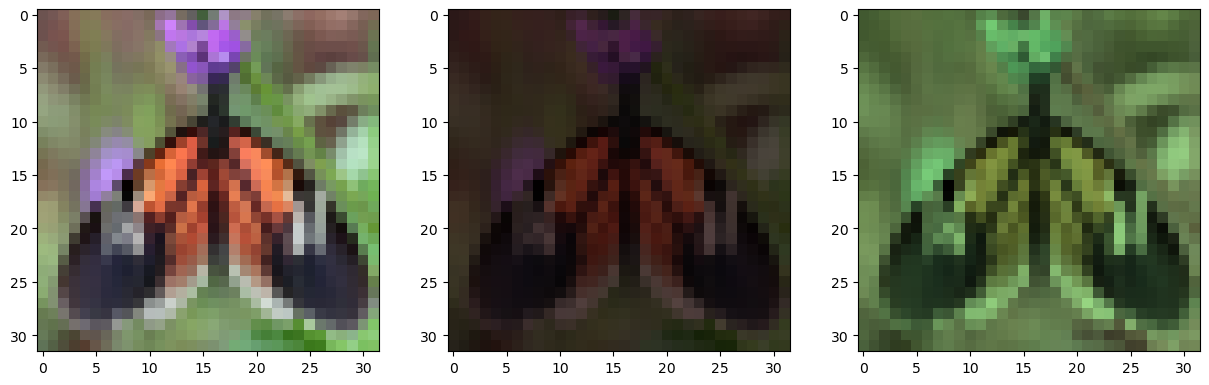

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img)
axs[1].imshow(img_2)
axs[2].imshow(img_3)

In [47]:
filter_1s = np.zeros((3,3,3), dtype=float)
filter_1s[1][1][0] = 0.3
filter_1s[1][1][1] = 0.3
filter_1s[1][1][2] = 0.4

Nesse caso, a imagem gerada seria o mesmo que multiplicar pelo filtro abaixo à direita, que não favorece mais a cor vermelha, mas sim o azul, o oposto no RGB'lue', o que acontece quando o filtro anterior é espelhado.

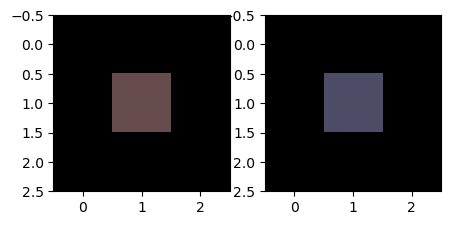

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(5,5))
axs[0].imshow(filter_1)
axs[1].imshow(filter_1s)

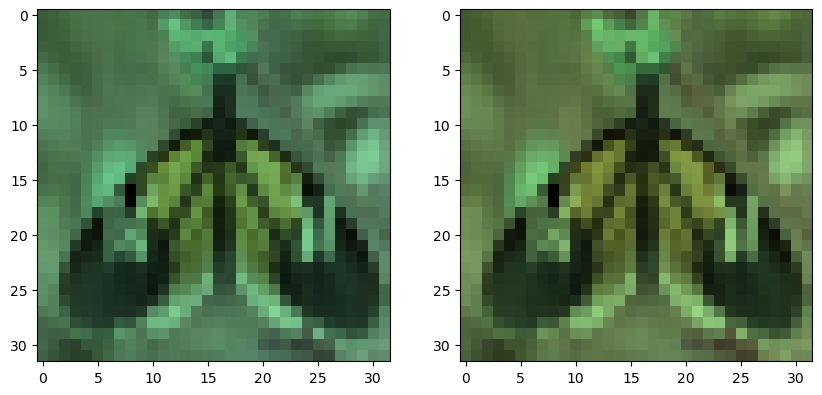

In [59]:
img_3s = sig.fftconvolve(img, filter_1s, mode = 'same')
img_3s = np.asarray(img_3s, dtype=np.uint8)
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(img_3s)
axs[1].imshow(img_3)

Faz-se a mesma função anterior, que resultou na imagem avermelhada, agora com o novo filtro espelhado e se vê que o resultado é bem mais parecido com o da função fftconvolve.

---

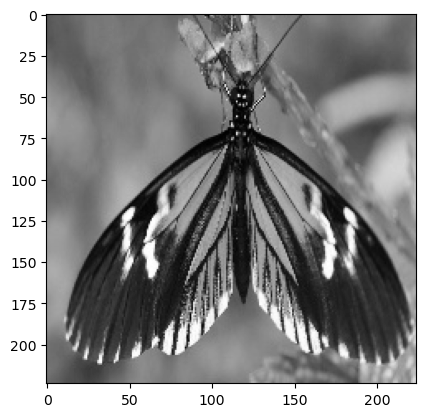

In [60]:
img_bw = im.convert(mode='L')
# img_bw = img_bw.resize(newsize)
img_bw = np.asarray(img_bw, dtype=np.uint8)
plt.imshow(img_bw, cmap='gray', vmin=0, vmax=255)

In [61]:
np.shape(img_bw)

(224, 224)

In [62]:
filter_2 = [-0.125, 0.0, 0.125],[-0.25, 0.0, 0.25],[-0.125, 0.0, 0.125]
filter_2 = np.asarray(filter_2)
filter_2

array([[-0.125,  0.   ,  0.125],
       [-0.25 ,  0.   ,  0.25 ],
       [-0.125,  0.   ,  0.125]])

In [63]:
img_4 = sig.fftconvolve(img_bw, filter_2, mode = 'same')
img_4 = np.asarray(img_4, dtype=np.uint8) / 1.25

In [64]:
img_4

array([[179.2, 204. ,   0. , ..., 204. , 204. ,  33.6],
       [170.4, 203.2, 204. , ..., 203.2, 203.2,  44.8],
       [170.4, 203.2, 204. , ..., 203.2, 203.2,  44.8],
       ...,
       [162.4,   0. ,   0.8, ..., 177.6, 192. ,  84. ],
       [163.2,   0. ,   0.8, ..., 176.8, 195.2,  85.6],
       [173.6,   0. ,   0.8, ..., 184. , 200. ,  64. ]])

In [65]:
filter_3 = [-0.125, -0.25, -0.125],[0.0, 0.0, 0.0],[0.125, 0.25, 0.125]
filter_3 = np.asarray(filter_3)
filter_3

array([[-0.125, -0.25 , -0.125],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.125,  0.25 ,  0.125]])

In [70]:
img_5 = sig.fftconvolve(img_bw, filter_3, mode = 'same')
img_5 = np.asarray(img_5, dtype=np.uint8) / 1.25

sobel = np.sqrt(np.square(img_4) + np.square(img_5)) / 1.25

---

Utilizando a imagem em preto e branco, apenas para simplificar as matrizes, criamos alguns filtros mais úteis, os de detecção de borda.
Abaixo, temos os 2 exemplos de detecção de borda, à esquerda, temos a detecção de bordas verticais, no meio, a detecção de bordas horizontais, e à direita temos a combinação das duas, pelo método de Sobel:
$$G=\sqrt{G^2_x+G^2_y}$$

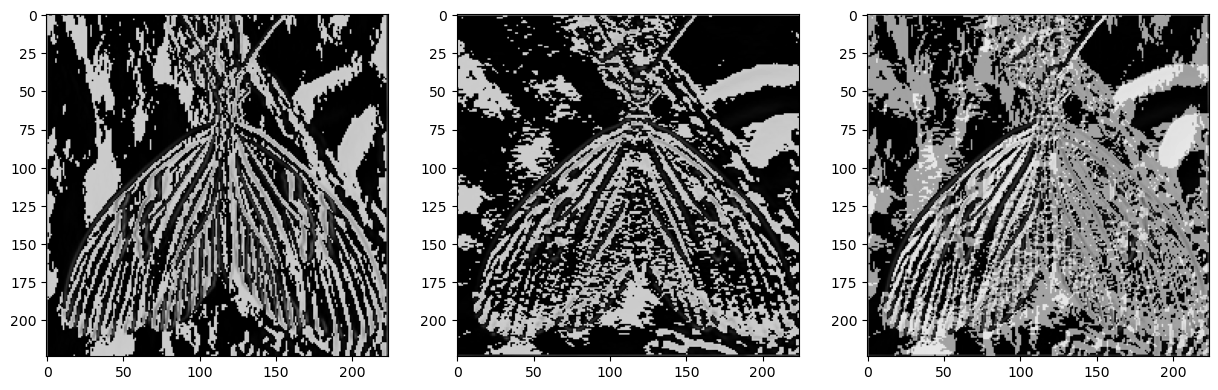

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img_4, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(img_5, cmap='gray', vmin=0, vmax=255)
axs[2].imshow(sobel, cmap='gray', vmin=0, vmax=255)

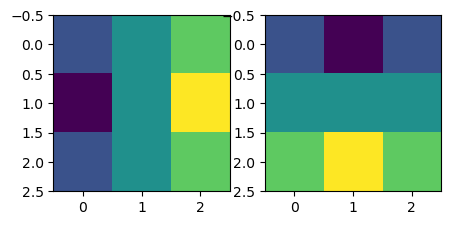

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(5,5))
axs[0].imshow(filter_2)
axs[1].imshow(filter_3)

Acima estão os filtros usados nas detecções de borda, vertical e horizontal respectivamente. Os zeros nos filtros estão representados por um azul-esverdeado, sendo valores negativos mais avermelhados e valores positivos mais amarelados.

---

---

# Redes Neurais Convolucionais (CNNs)

CNNs são um tipo de modelo de deep learning projetados especificamente para processamento e análise de imagens. São compostos por multiplas camadas, assim como qualquer NN, cada uma com um papel específico na classificação de imagens.

Cada camada possui seus próprios filtros, mas diferente dos feitos aqui manualmente, a rede aprende os seus valores automaticamente durante o processo de treinamento. Cada filtro aprendido realiza a convolução, criando mapas de features, que capturam padrões ou features presentes em cada imagem, gerando assim um modelo que consegue reconhecer e classificar imagens.

---

Inferência: https://huggingface.co/spaces/matheusfga/lesson_8